In [29]:
# Import necessary libraries
!pip install matplotlib
!pip install imageio
!pip install scipy
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import imageio
import scipy
from scipy.ndimage import laplace


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip install requests
import requests

# Define the URLs for the images
image_urls = {
    "coppit": "https://raw.githubusercontent.com/SRAVAN-IITB/IITB-Acads/848b93a82f01911435fea786d79efa6944561adc/Semester-5/CS663/PROJECT/Research%20Paper%20Implementation/coppit.png",
    "svalbard": "https://raw.githubusercontent.com/SRAVAN-IITB/IITB-Acads/848b93a82f01911435fea786d79efa6944561adc/Semester-5/CS663/PROJECT/Research%20Paper%20Implementation/svalbard.png",
    "comic": "https://raw.githubusercontent.com/SRAVAN-IITB/IITB-Acads/848b93a82f01911435fea786d79efa6944561adc/Semester-5/CS663/PROJECT/Research%20Paper%20Implementation/comic.png",
    "comic_detail": "https://raw.githubusercontent.com/SRAVAN-IITB/IITB-Acads/848b93a82f01911435fea786d79efa6944561adc/Semester-5/CS663/PROJECT/Research%20Paper%20Implementation/comic_detail.png"
}

# Directory to store the downloaded images
download_dir = "downloaded_images"
os.makedirs(download_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Function to download and save the image from URL
def download_image(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded and saved {save_path}")
    else:
        print(f"Failed to download {url}")

# Download all images
for name, url in image_urls.items():
    image_path = os.path.join(download_dir, f"{name}.png")
    download_image(url, image_path)


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Downloaded and saved downloaded_images\coppit.png
Downloaded and saved downloaded_images\svalbard.png
Downloaded and saved downloaded_images\comic.png
Downloaded and saved downloaded_images\comic_detail.png


In [31]:
# Paths to Images
image_path = {
    "coppit": os.path.join(download_dir, "coppit.png"),
    "svalbard": os.path.join(download_dir, "svalbard.png"),
    "comic": os.path.join(download_dir, "comic.png"),
    "comic_detail": os.path.join(download_dir, "comic_detail.png")
}


# Output directories
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [32]:
print(f"Loading image from: {image_path}")


Loading image from: {'coppit': 'downloaded_images\\coppit.png', 'svalbard': 'downloaded_images\\svalbard.png', 'comic': 'downloaded_images\\comic.png', 'comic_detail': 'downloaded_images\\comic_detail.png'}


Successfully loaded image: coppit


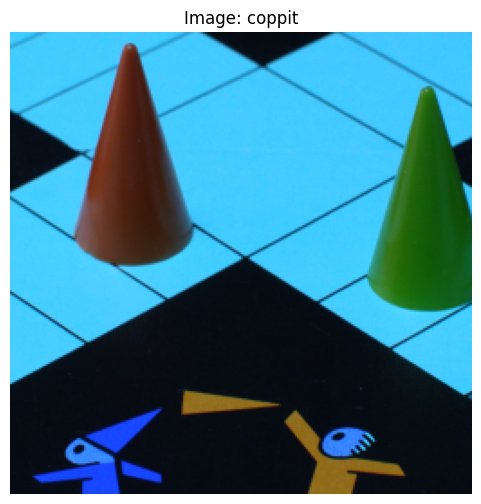



Successfully loaded image: svalbard


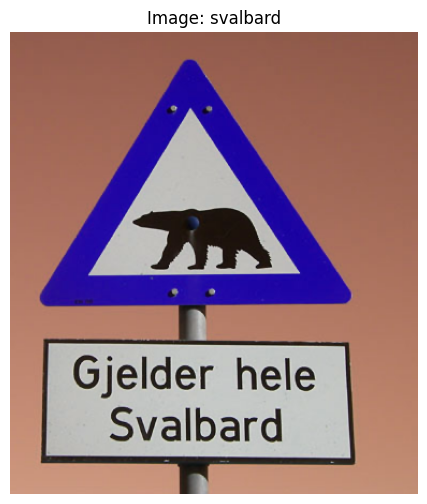



Successfully loaded image: comic


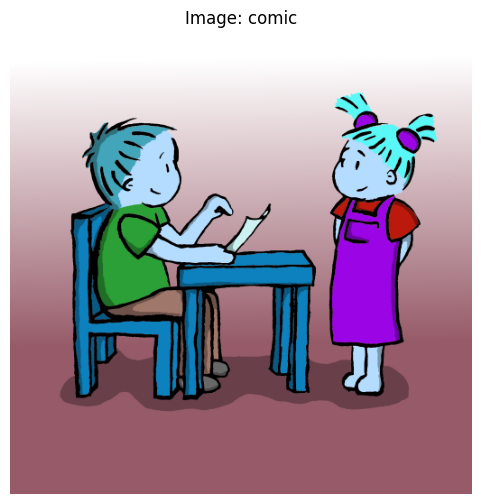



Successfully loaded image: comic_detail


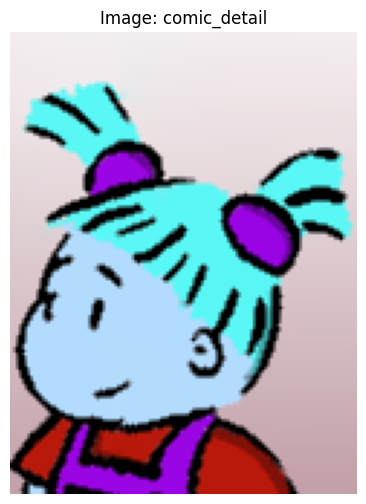

In [33]:
# Iterate over each image path
for name, path in image_path.items():
    try:
        # Attempt to read the image
        im = cv2.imread(path)

        # Check if the image is successfully loaded
        if im is None:
            raise FileNotFoundError(f"Image not found: {path}")

        # If successful, you can process the image here
        print(f"Successfully loaded image: {name}")

        # Display the image
        plt.figure(figsize=(6, 6))
        plt.imshow(im)
        plt.title(f"Image: {name}")
        plt.axis('off')  # Hide axes
        plt.show()

        print("=================================================================")
        print('\n')

    except Exception as e:
        # If an error occurs (e.g., file not found or read error)
        print(f"Error loading image {name}: {e}")

In [34]:
def encoder(image_path, mask_path, masked_image_path):
    """
    Args:
        image_path: Path to the input image.
        mask_path: Path to save the mask.
        masked_image_path: Path to save the masked image.
    """
    im = cv2.imread(image_path)
    gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_im, 100, 200)  # Canny edge detection
    mask = np.ones_like(im, dtype=np.uint8) * 255  # Initialize white mask
    mask[edges == 255] = 0  # Black where edges exist

    # Expand the edge region to exclude neighborhoods
    kernel = np.ones((3, 3), np.uint8)  # Neighborhood size can be tuned
    expanded_edges = cv2.dilate(edges, kernel, iterations=1)
    mask[expanded_edges == 255] = 0

    # Exclude boundary pixels from the mask
    mask[0, :, :] = 0
    mask[-1, :, :] = 0
    mask[:, 0, :] = 0
    mask[:, -1, :] = 0

    # Masked image
    masked_image = im * (mask // 255)

    # Save outputs
    cv2.imwrite(mask_path, mask)
    cv2.imwrite(masked_image_path, masked_image)

    # Display results
    plt.figure()
    plt.title("Mask")
    plt.imshow(mask, cmap="gray")
    plt.axis("off")
    plt.show()

    plt.figure()
    plt.title("Masked Image")
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [35]:
def subsampler(image_path, mask_save_path, d=2):
    """
    Subsamples edge pixels based on distance threshold.
    """
    im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(im, 100, 200)

    # Subsample edges
    m, n = edges.shape
    sampled_mask = np.zeros_like(edges, dtype=np.uint8)
    for i in range(0, m, d):
        for j in range(0, n, d):
            if edges[i, j] == 255:
                sampled_mask[i, j] = 255

    # Save and display
    cv2.imwrite(mask_save_path, sampled_mask)
    plt.figure()
    plt.title("Subsampled Mask")
    plt.imshow(sampled_mask, cmap="gray")
    plt.axis("off")
    plt.show()


In [36]:
import json

def supersampler(image_path, subsampled_mask_path, sampled_data_path):
    """
    Gathers pixel values around sampled edge points for reconstruction.
    Args:
        image_path: Path to the input image.
        subsampled_mask_path: Path to the subsampled mask.
        sampled_data_path: Path to save sampled pixel values.
    """
    im = cv2.imread(image_path)
    subsampled_mask = cv2.imread(subsampled_mask_path, cv2.IMREAD_GRAYSCALE) // 255

    sampled_data = []
    m, n = subsampled_mask.shape

    # Gather sampled data
    for i in range(m):
        for j in range(n):
            if subsampled_mask[i, j] == 1:
                sampled_data.append({"row": i, "col": j, "pixel": im[i, j].tolist()})

    # # Save sampled data as JSON
    # with open(sampled_data_path, "w") as f:
    #     json.dump(sampled_data, f)
    
    # Save sampled data in .npy format instead of JSON for better storage efficiency
    np.save(sampled_data_path, sampled_data)

    print(f"Sampled data saved to {sampled_data_path}.")


In [37]:
from scipy.ndimage import laplace
import json

def decoder(mask_path, masked_image_path, orig_image_path, sampled_data_path, save_path, delta_t=0.01, max_iter=10000):
    """
    Decoder function that reconstructs missing data using homogeneous diffusion.
    Args:
        mask_path: Path to the mask image.
        masked_image_path: Path to the masked image.
        orig_image_path: Path to the original image.
        sampled_data_path: Path to the sampled data JSON file.
        save_path: Path to save the restored image.
        delta_t: Time step for diffusion.
        max_iter: Maximum number of iterations.
    Returns:
        PSNR value.
    """
    # Load images
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) // 255  # Binary mask
    masked_image = cv2.imread(masked_image_path).astype(float)
    original_image = cv2.imread(orig_image_path).astype(float)
    reconstructed_image = masked_image.copy()

    # Load sampled data from .npy file
    sampled_data = np.load(sampled_data_path, allow_pickle=True)

    # Apply sampled data to reconstructed image
    for sample in sampled_data:
        row, col, pixel = sample["row"], sample["col"], sample["pixel"]
        reconstructed_image[row, col] = pixel  # Restore sampled pixel values

    # Perform homogeneous diffusion to fill missing data
    for iteration in range(max_iter):
        # Compute the Laplacian
        laplacian = laplace(reconstructed_image, mode="reflect")
        prev_image = reconstructed_image.copy()

        # Update only masked regions (Dirichlet boundary condition)
        reconstructed_image[mask == 1] += delta_t * laplacian[mask == 1]

        # Convergence check
        if np.mean(np.abs(reconstructed_image - prev_image)) < 1e-4:
            print(f"Converged after {iteration} iterations.")
            break

    # Calculate PSNR
    mse = np.mean((original_image - reconstructed_image) ** 2)
    psnr = 10 * np.log10(255**2 / mse)
    print(f"PSNR: {psnr:.2f} dB")

    # Save and display the restored image
    cv2.imwrite(save_path, reconstructed_image.astype(np.uint8))
    plt.figure()
    plt.title("Restored Image")
    plt.imshow(cv2.cvtColor(reconstructed_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    return psnr


In [38]:
# Output directory
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Function to calculate divergence
def calculate_divergence(image):
    """
    Calculate the divergence (Laplacian norm) for the given image.
    """
    laplacian_x = np.roll(image, -1, axis=1) - 2 * image + np.roll(image, 1, axis=1)
    laplacian_y = np.roll(image, -1, axis=0) - 2 * image + np.roll(image, 1, axis=0)
    laplacian = laplacian_x + laplacian_y
    return np.linalg.norm(laplacian)

Processing coppit...


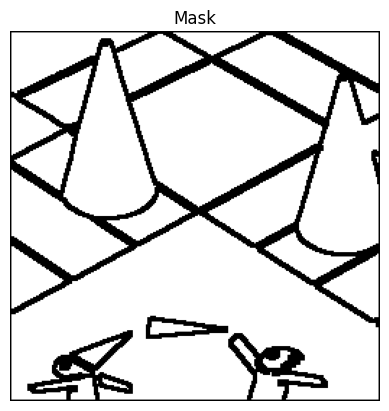

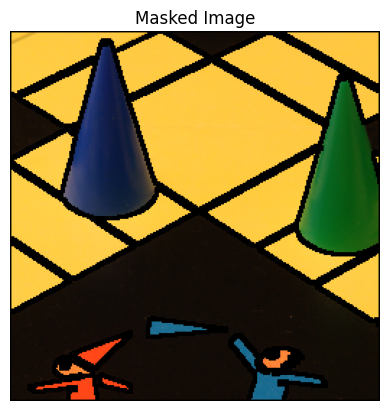

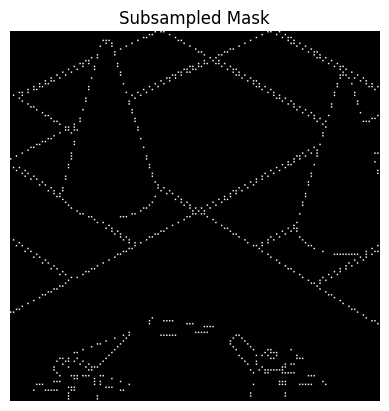

Sampled data saved to output\coppit_sampled_data.npy.
Final PSNR for coppit: 8.41 dB


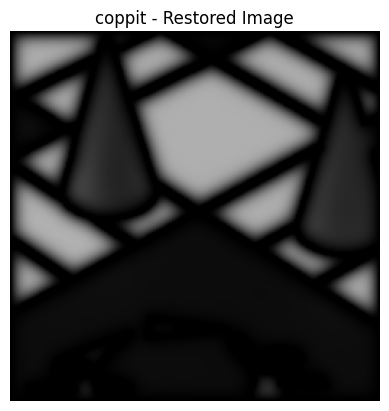

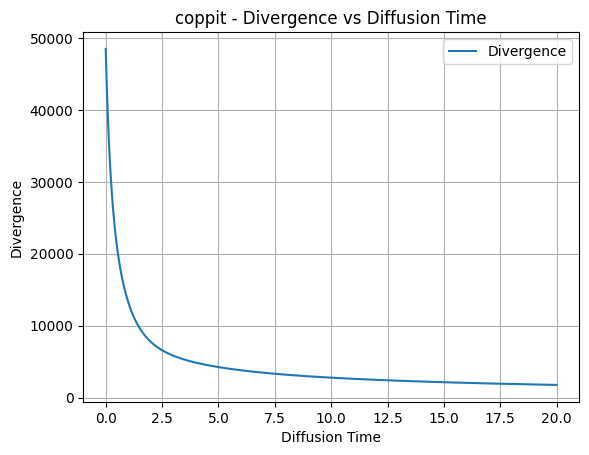

Processing svalbard...


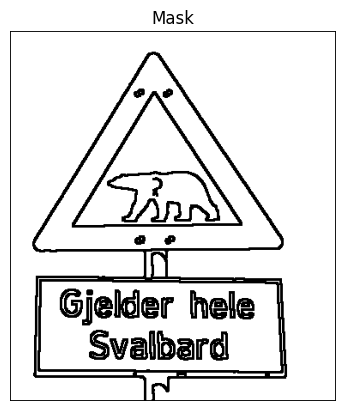

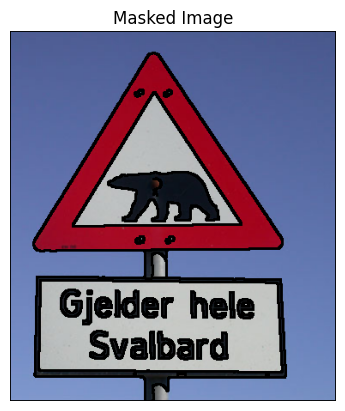

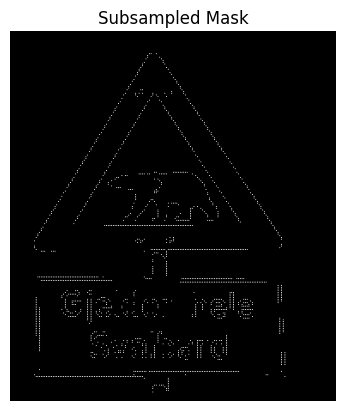

Sampled data saved to output\svalbard_sampled_data.npy.
Final PSNR for svalbard: 9.99 dB


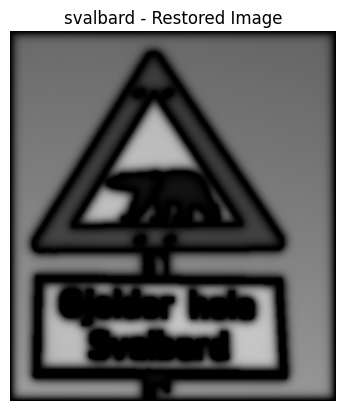

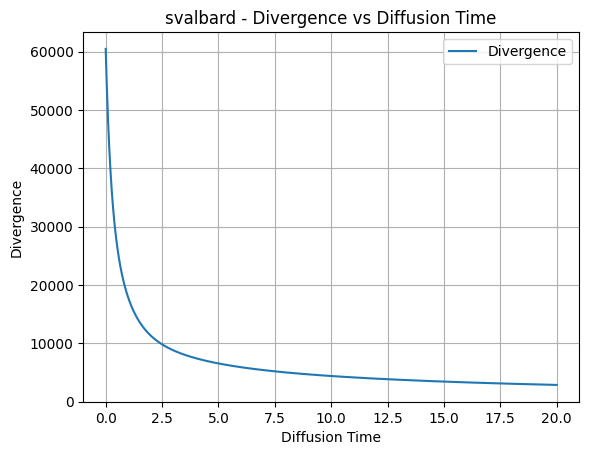

Processing comic...


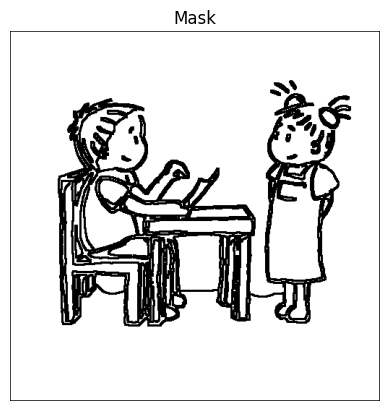

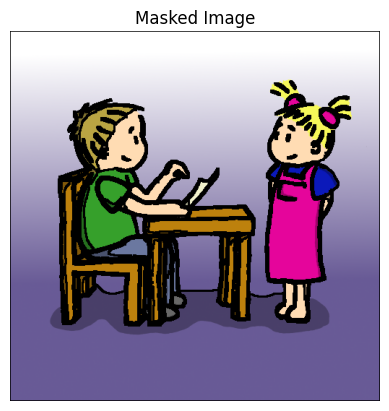

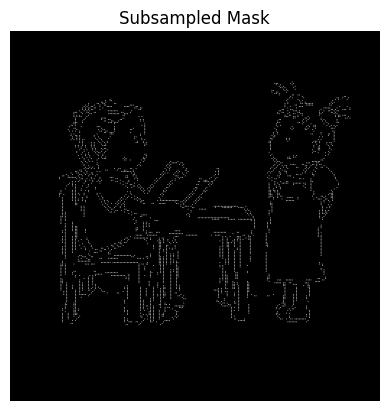

Sampled data saved to output\comic_sampled_data.npy.
Final PSNR for comic: 10.57 dB


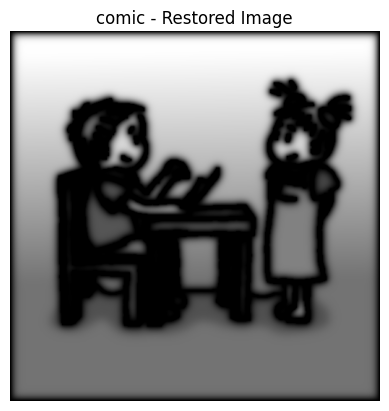

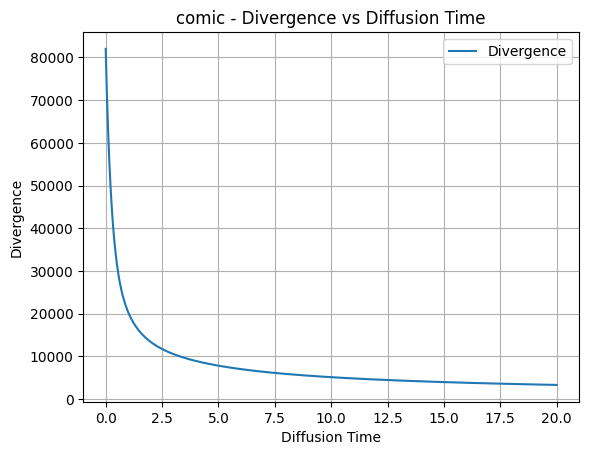

Processing comic_detail...


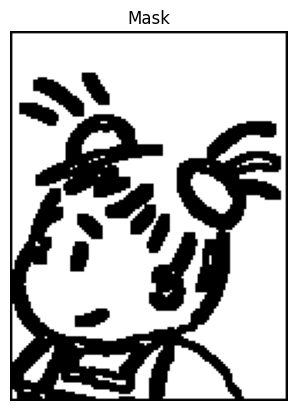

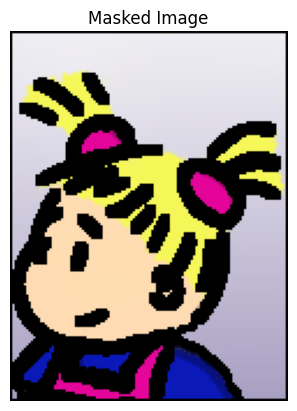

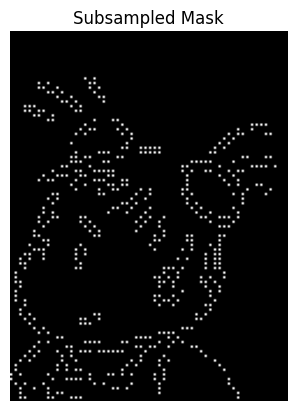

Sampled data saved to output\comic_detail_sampled_data.npy.
Final PSNR for comic_detail: 5.38 dB


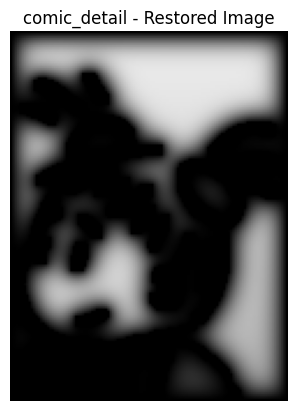

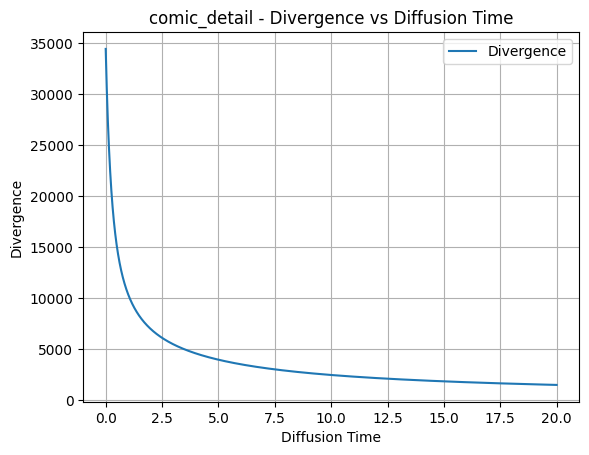

In [40]:
# Process each image
psnr_results = {}
divergence_over_time = {}
psnr_over_time = {}

for name, img_path in image_path.items():
    print(f"Processing {name}...")

    # Define paths
    mask_path = os.path.join(output_dir, f"{name}_mask.png")
    masked_img_path = os.path.join(output_dir, f"{name}_masked.png")
    restored_img_path = os.path.join(output_dir, f"{name}_restored.png")
    subsampled_mask_path = os.path.join(output_dir, f"{name}_subsampled_mask.png")
    # sampled_data_path = os.path.join(output_dir, f"{name}_sampled_data.json")  # JSON format for sampled data
    sampled_data_path = os.path.join(output_dir, f"{name}_sampled_data.npy")  # Now using .npy format for sampled data


    # Step 1: Encoder
    encoder(img_path, mask_path, masked_img_path)

    # Step 2: Subsampler
    subsampler(img_path, subsampled_mask_path)

    # Step 3: Super Sampler
    supersampler(img_path, subsampled_mask_path, sampled_data_path)

    # Step 4: Decoder with PSNR and Divergence Tracking
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) // 255
    masked_image = cv2.imread(masked_img_path).astype(float)
    original_image = cv2.imread(img_path).astype(float)
    reconstructed_image = masked_image.copy()

    delta_t = 0.001
    max_iter = 20000
    tolerance = 1e-6  # Convergence tolerance
    time_steps = np.arange(0, max_iter * delta_t, delta_t)
    psnr_values = []
    divergence_values = []

    for iteration, t in enumerate(time_steps):
        # Compute the Laplacian
        laplacian = laplace(reconstructed_image, mode="reflect")
        prev_image = reconstructed_image.copy()

        # Update only masked regions (Dirichlet boundary condition)
        reconstructed_image[mask == 1] += delta_t * laplacian[mask == 1]

        # Calculate PSNR and Divergence
        mse = np.mean((original_image - reconstructed_image) ** 2)
        psnr = 10 * np.log10(255**2 / mse)
        divergence = np.linalg.norm(laplacian)

        psnr_values.append(psnr)
        divergence_values.append(divergence)

        # Convergence check
        if np.mean(np.abs(reconstructed_image - prev_image)) < tolerance:
            print(f"Converged after {iteration} iterations.")
            break

    # Save final reconstructed image
    cv2.imwrite(restored_img_path, reconstructed_image.astype(np.uint8))

    # Save PSNR and Divergence for this image
    psnr_results[name] = psnr_values[-1]
    divergence_over_time[name] = divergence_values
    psnr_over_time[name] = psnr_values

    # Display final restored image
    print(f"Final PSNR for {name}: {psnr:.2f} dB")
    plt.figure()
    plt.title(f"{name} - Restored Image")
    plt.imshow(cv2.cvtColor(reconstructed_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    # Plot Divergence vs Diffusion Time
    plt.figure()
    plt.plot(time_steps[:len(divergence_values)], divergence_values, label="Divergence")
    plt.xlabel("Diffusion Time")
    plt.ylabel("Divergence")
    plt.title(f"{name} - Divergence vs Diffusion Time")
    plt.legend()
    plt.grid(True)
    plt.show()


In [41]:
# Display PSNR Results
print("\nFinal PSNR Results:")
for name, psnr in psnr_results.items():
    print(f"{name}: {psnr:.2f} dB")


Final PSNR Results:
coppit: 8.41 dB
svalbard: 9.99 dB
comic: 10.57 dB
comic_detail: 5.38 dB


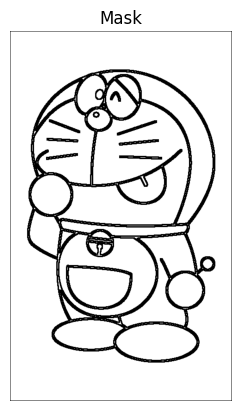

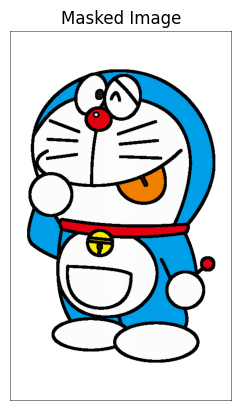

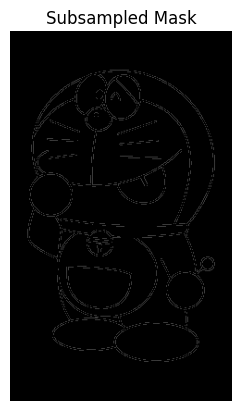

Sampled data saved to output_gui\comic_detail_sampled_data.npy.
Compression Rate: 62.97%
Compressed Size: 138.53 KB
Original Size: 219.99 KB
Final PSNR: 5.73 dB
Final MSE: 17368.74


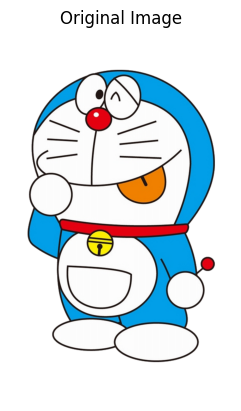

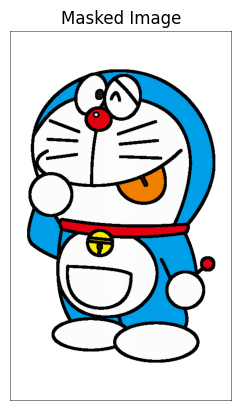

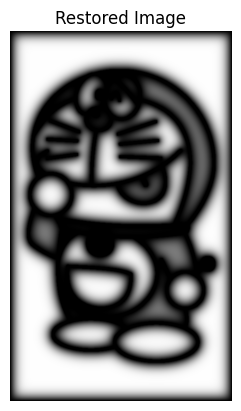

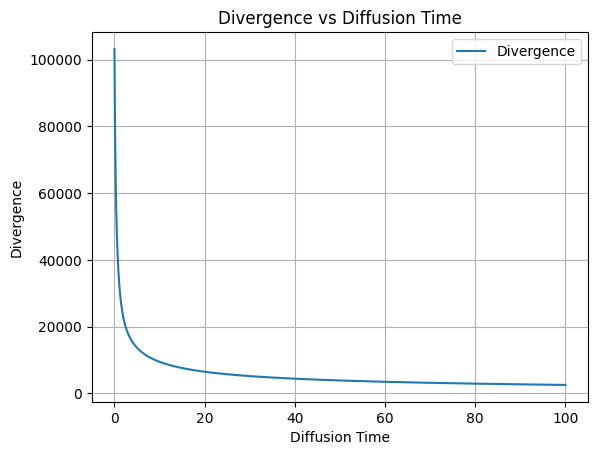

In [42]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import cv2
import numpy as np
import os
from scipy.ndimage import laplace
import json
import matplotlib.pyplot as plt
import os

# Function to calculate MSE
def calculate_mse(original, reconstructed):
    return np.mean((original.astype(float) - reconstructed.astype(float)) ** 2)


# Function to calculate Compression Rate
def calculate_compression_rate(original_path, mask_path, sampled_data_path):
    original_size = os.path.getsize(original_path)  # Size of the original image in bytes
    mask_size = os.path.getsize(mask_path)          # Size of the grayscale mask in bytes
    sampled_data_size = os.path.getsize(sampled_data_path)  # Size of the sampled data in .npy format
    
    # Calculate the total compressed size (mask + sampled data)
    compressed_size = mask_size + sampled_data_size
    
    # Compression rate is the ratio of compressed size to original size
    compression_rate = compressed_size / original_size
    return compression_rate, compressed_size, original_size


# Function to process the uploaded image
def process_image():
    # Open file dialog to choose an image
    file_path = filedialog.askopenfilename(
        title="Select an Image File",
        filetypes=[("Image Files", "*.png *.jpg *.jpeg *.bmp")],
    )

    if not file_path:
        messagebox.showwarning("No File Selected", "Please select an image file to proceed.")
        return

    output_dir = "output_gui"
    os.makedirs(output_dir, exist_ok=True)

    # Define paths for processing
    image_name = os.path.splitext(os.path.basename(file_path))[0]
    mask_path = os.path.join(output_dir, f"{image_name}_mask.png")
    masked_img_path = os.path.join(output_dir, f"{image_name}_masked.png")
    restored_img_path = os.path.join(output_dir, f"{image_name}_restored.png")
    subsampled_mask_path = os.path.join(output_dir, f"{image_name}_subsampled_mask.png")
    # sampled_data_path = os.path.join(output_dir, f"{image_name}_sampled_data.json")
    sampled_data_path = os.path.join(output_dir, f"{name}_sampled_data.npy")  # Now using .npy format for sampled data


    # Step 1: Encoder
    encoder(file_path, mask_path, masked_img_path)

    # Step 2: Subsampler
    subsampler(file_path, subsampled_mask_path)

    # Step 3: Supersampler
    supersampler(file_path, subsampled_mask_path, sampled_data_path)

    # Step 4: Decoder with PSNR and MSE Calculation
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) // 255
    masked_image = cv2.imread(masked_img_path).astype(float)
    original_image = cv2.imread(file_path).astype(float)
    reconstructed_image = masked_image.copy()

    delta_t = 0.01
    max_iter = 10000
    tolerance = 1e-6  # Convergence tolerance
    time_steps = np.arange(0, max_iter * delta_t, delta_t)
    psnr_values = []
    divergence_values = []

    for iteration, t in enumerate(time_steps):
        laplacian = laplace(reconstructed_image, mode="reflect")
        prev_image = reconstructed_image.copy()

        # Update only masked regions (Dirichlet boundary condition)
        reconstructed_image[mask == 1] += delta_t * laplacian[mask == 1]

        # Calculate PSNR and Divergence
        # Calculate PSNR
        mse = np.mean((original_image - reconstructed_image) ** 2)  # Mean Squared Error
        psnr = 10 * np.log10(255**2 / mse)  # PSNR formula
        divergence = np.linalg.norm(laplacian)

        psnr_values.append(psnr)
        divergence_values.append(divergence)

        # Convergence check
        if np.mean(np.abs(reconstructed_image - prev_image)) < tolerance:
            break

    cv2.imwrite(restored_img_path, reconstructed_image.astype(np.uint8))

    # Calculate Compression Rate
    compression_rate, compressed_size, original_size = calculate_compression_rate(file_path, mask_path, sampled_data_path)

    # Display Results
    print(f"Compression Rate: {compression_rate:.2%}")
    print(f"Compressed Size: {compressed_size / 1024:.2f} KB")
    print(f"Original Size: {original_size / 1024:.2f} KB")
    print(f"Final PSNR: {psnr_values[-1]:.2f} dB")
    print(f"Final MSE: {mse:.2f}")

    # Show Processed Images
    plt.figure()
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    plt.figure()
    plt.title("Masked Image")
    plt.imshow(cv2.cvtColor(cv2.imread(masked_img_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    plt.figure()
    plt.title("Restored Image")
    plt.imshow(cv2.cvtColor(reconstructed_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    # Plot Divergence vs Diffusion Time
    plt.figure()
    plt.plot(time_steps[:len(divergence_values)], divergence_values, label="Divergence")
    plt.xlabel("Diffusion Time")
    plt.ylabel("Divergence")
    plt.title("Divergence vs Diffusion Time")
    plt.legend()
    plt.grid(True)
    plt.show()


# Create a simple GUI using Tkinter
root = tk.Tk()
root.title("Edge-Based Image Compression")

frame = tk.Frame(root, padx=10, pady=10)
frame.pack()

label = tk.Label(frame, text="Click the button below to select an image for processing:", font=("Arial", 12))
label.pack(pady=5)

process_button = tk.Button(frame, text="Select Image and Process", command=process_image, font=("Arial", 12), bg="blue", fg="white")
process_button.pack(pady=10)

root.mainloop()